In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers import *
from keras.utils import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
# from nltk.translate.bleu_score import sentence_bleu

2023-08-26 22:13:49.972129: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-26 22:13:49.999055: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 22:13:50.403888: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras import backend 
from tensorflow.keras import utils

In [3]:
df_full = pd.read_csv('data/PHOENIX-2014-T.train.corpus.csv', sep='|')

In [4]:
df = df_full.drop(columns=['name','video','start','end','speaker'])
df.columns

Index(['orth', 'translation'], dtype='object')

In [5]:
df.shape

(7096, 2)

In [6]:
df.describe()

,orth,translation
count,7096,7096
unique,6900,6853
top,SCHOEN ABEND TSCHUESS,guten abend liebe zuschauer
freq,22,63


In [7]:
df.iloc[1]['orth']

'ORT REGEN DURCH REGEN KOENNEN UEBERSCHWEMMUNG KOENNEN'

In [8]:
df.iloc[1]['translation']

'mancherorts regnet es auch länger und ergiebig auch lokale überschwemmungen sind wieder möglich'

In [9]:
data_size = df.shape[1]
input_texts = df['translation']
target_texts = df['orth']
target_texts = ['<Start> ' + text + ' <End>' for text in target_texts]

In [10]:
input_texts[1]

'mancherorts regnet es auch länger und ergiebig auch lokale überschwemmungen sind wieder möglich'

In [11]:
target_texts[1]

'<Start> ORT REGEN DURCH REGEN KOENNEN UEBERSCHWEMMUNG KOENNEN <End>'

In [12]:
target_texts = [text.replace('-', ' - ') for text in target_texts]

umlaut_dict = {'AE': 'Ä',
               'OE': 'Ö',
               'UE': 'Ü'}
for key in umlaut_dict.keys():
    target_texts = [text.replace(key, umlaut_dict[key]) for text in target_texts]

In [13]:
d_input = {}
for s in input_texts:
    words = s.split(' ')
    for w in words:
        if w in d_input.keys():
            d_input[w]+= 1
        else:
            d_input[w] = 1
sd = sorted(d_input, key=d_input.get)
sd.reverse()
print("Unique words: ",len(sd),", Total words: ",sum(d_input.values()))
for s in sd:
    print(s, d_input[s])

Unique words:  2887 , Total words:  99081
und 4156
im 2934
es 2852
der 2462
am 2197
in 1938
die 1865
auch 1747
grad 1588
bis 1526
den 1429
morgen 1292
nacht 1042
noch 974
an 962
regen 838
heute 838
sich 825
wolken 823
ein 747
süden 742
sonne 740
norden 737
ist 722
wird 709
für 661
das 649
schauer 606
mit 604
von 582
aber 579
westen 579
dann 573
sonst 546
tag 498
wind 489
da 484
osten 483
wieder 474
auf 465
mal 461
über 460
teilweise 454
gewitter 453
aus 439
vor 436
zum 416
oder 403
nur 395
wettervorhersage 390
nun 387
etwas 385
schnee 385
hier 370
meist 367
wetter 361
abend 359
regnet 352
gibt 348
nordwesten 343
uns 334
bleibt 331
allem 315
nach 311
minus 306
zu 301
bei 296
freitag 287
sind 286
teil 282
richtung 279
weht 269
dabei 267
freundlich 265
dem 262
donnerstag 260
südosten 254
sonntag 252
samstag 249
dort 245
luft 241
werden 239
trocken 236
nebel 235
nordsee 234
mittwoch 227
temperaturen 227
südwesten 226
kann 218
mäßig 214
schon 209
einzelne 207
nordosten 206
wir 204
so 204
mo

In [14]:
d_target = {}
for s in target_texts:
    words = s.split(' ')
    for w in words:
        if w in d_target.keys():
            d_target[w]+= 1
        else:
            d_target[w] = 1
sd = sorted(d_target, key=d_target.get)
sd.reverse()
print("Unique words: ",len(sd),", Total words: ",sum(d_target.values()))
for s in sd:
    print(s, d_target[s])

Unique words:  977 , Total words:  72661
<End> 7096
<Start> 7096
REGEN 2157
REGION 1885
- 1611
IX 1505
KOMMEN 1326
MORGEN 1266
NORD 1218
SONNE 1143
WOLKE 1109
GRAD 1052
NACHT 871
SÜD 835
KÖNNEN 817
AUCH 786
SCHNEE 769
MEHR 768
BISSCHEN 751
HEUTE 748
BIS 696
GEWITTER 674
WETTER 669
WIND 637
WEHEN 581
ZWANZIG 536
OST 532
DANN 531
WEST 486
SCHAÜR 477
WIE 455
MÖGLICH 433
ABEND 430
NEBEL 419
FREUNDLICH 418
BERG 415
JETZT 414
NORDWEST 408
ABER 386
STURM 385
TAG 378
TEIL 349
AUSSEHEN 346
TIEF 328
MINUS 320
FLUSS 320
SÜDOST 314
MITTE 310
WECHSELHAFT 303
KLAR 301
VIEL 299
SONNTAG 295
SCHWACH 294
KÜHL 291
FREITAG 290
TROCKEN 289
SAMSTAG 280
STARK 275
HOCH 274
MÄSSIG 270
BESONDERS 269
SONST 262
DONNERSTAG 262
IN 257
MEISTENS 254
UND 252
BLEIBEN 250
KOMMEND 247
KALT 242
MITTWOCH 232
MONTAG 225
LAND 223
WARM 223
TEMPERATUR 221
NORDOST 219
NUR 219
FÜNF 217
SÜDWEST 217
ALPEN 215
DEUTSCH 206
GUT 201
MITTAG 197
DIENSTAG 197
EINS 194
IM 192
KÜSTE 190
FROST 187
ZWEI 187
SCHÖN 186
DREI 184
neg 175
MILD 17

In [15]:
target_texts[0]

'<Start> JETZT WETTER MORGEN DONNERSTAG ZWÖLF FEBRUAR <End>'

In [16]:
input_texts_split = [text.split() for text in input_texts]
target_texts_split = [text.split() for text in target_texts]

input_texts_split = [[('<Unknown>' if d_input[w] == 1 else w) for w in text] for text in input_texts_split]
target_texts_split = [[('<Unknown>' if d_target[w] == 1 else w) for w in text] for text in target_texts_split]
        

input_words = sorted(set([word for text in input_texts_split for word in text]))
target_words = sorted(set([word for text in target_texts_split for word in text]))

num_input_words = len(input_words)
num_target_words = len(target_words)

input_word_index = {word: ind+1 for ind,word in enumerate(input_words)}
input_word_index[''] = 0
target_word_index = {word: ind+1 for ind,word in enumerate(target_words)}
target_word_index[''] = 0
#0 ce predstavljati praznina zbog paddovanja

inverted_input_word_index = {value: key for key,value in input_word_index.items()}
inverted_target_word_index = {value: key for (key,value) in target_word_index.items()}

max_input_seq_len = np.max([len(text) for text in input_texts_split])
max_target_seq_len = np.max([len(text) for text in target_texts_split])

#Pregled najduzih recenica inputa i targeta
#print(input_texts[np.argmax([len(text) for text in input_texts_split])])
#print(target_texts[np.argmax([len(text) for text in target_texts_split])]) #Ista recenica

input_pad_len = max_input_seq_len
target_pad_len = max_target_seq_len 
#Treba ova 2 staviti na vecu vrednost da bi model radio sa duzim recenicama


In [17]:
target_texts[12]

'<Start> LANG ZEIT REGION HOCH KOMMEN OST KOMMEN SONST REGION DEUTSCH STARK RUHIG AUCH TEILWEISE FREUNDLICH SONNE <End>'

In [18]:
encoder_input_data = []
for text in input_texts_split:
    encoder_input_data.append([input_word_index.get(word, 0) for word in text])
encoder_input_data = pad_sequences(encoder_input_data, input_pad_len, padding = 'post')

decoder_input_data = []
decoder_output_data = []
for text in target_texts_split:
    decoder_input_data.append([target_word_index.get(word, 0) for word in text])
    decoder_output_data.append([target_word_index.get(word,0) for word in text[1:]]) 
decoder_input_data = pad_sequences(decoder_input_data, target_pad_len, padding = 'post')
decoder_output_data = pad_sequences(decoder_output_data, target_pad_len, padding = 'post')

In [19]:
encoder_input_data.shape

(7096, 52)

In [20]:
decoder_input_data.shape

(7096, 36)

In [21]:
decoder_output_data.shape

(7096, 36)

In [22]:
embedding_size = 300

input_word_embeddings = {}
target_word_embeddings = {}
with open('glove-embedding/vectors.txt', 'r', encoding = 'utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype = 'float32')
        input_word_embeddings[word] = coefs
        target_word_embeddings[word.upper()] = coefs

In [23]:
oov_words_input = []
for word in input_words:
    if not word in input_word_embeddings:
        oov_words_input.append(word)

In [24]:
oov_words_target = []
for word in target_words:
    if not word in target_word_embeddings:
        oov_words_target.append(word)

In [25]:
input_embedding_matrix = np.zeros((num_input_words + 1, embedding_size))
for i in range(num_input_words):
    input_embedding_matrix[i + 1] = input_word_embeddings.get(inverted_input_word_index[i+1], np.zeros(embedding_size))

target_embedding_matrix = np.zeros((num_target_words + 1, embedding_size))
for i in range(num_target_words):
    target_embedding_matrix[i + 1] = target_word_embeddings.get(inverted_target_word_index[i+1], np.zeros(embedding_size))

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization

In [27]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)


class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=None,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)

In [28]:
latent_dim = 128

In [29]:
num_heads = 8

In [30]:
encoder_inputs = Input(shape=(input_pad_len,))
x = PositionalEmbedding(input_pad_len, num_input_words + 1, embedding_size)(encoder_inputs)
encoder_outputs = TransformerEncoder(embedding_size, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)

2023-08-26 22:14:27.703666: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-26 22:14:27.724197: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


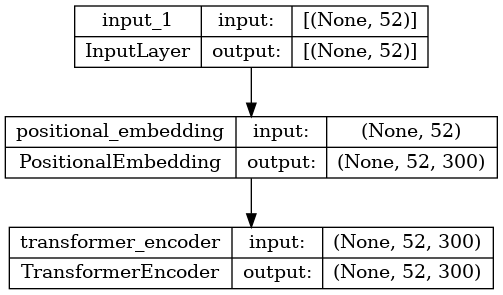

In [31]:
import pydot
utils.plot_model(encoder, show_shapes=True, expand_nested=True)

In [32]:
decoder_inputs = Input(shape=(target_pad_len,))
encoded_seq_inputs = Input(shape=(input_pad_len, embedding_size))
x = PositionalEmbedding(target_pad_len, num_target_words + 1, embedding_size)(decoder_inputs)
x = TransformerDecoder(embedding_size, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(num_target_words + 1, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

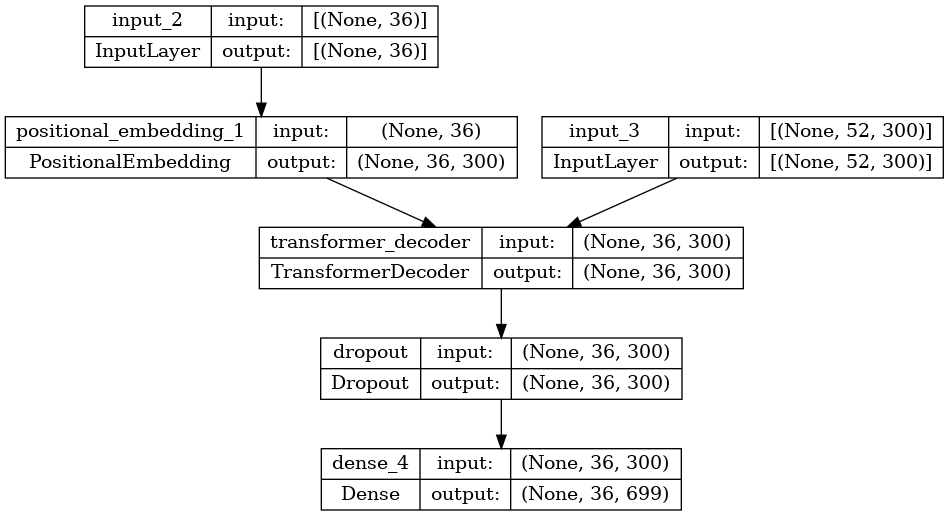

In [33]:
import pydot
utils.plot_model(decoder, show_shapes=True, expand_nested=True)

In [34]:
decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)
transformer.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 52)]                 0         []                            
                                                                                                  
 positional_embedding (Posi  (None, 52, 300)              559200    ['input_1[0][0]']             
 tionalEmbedding)                                                                                 
                                                                                                  
 input_2 (InputLayer)        [(None, 36)]                 0         []                            
                                                                                                  
 transformer_encoder (Trans  (None, 52, 300)              2965928   ['positional_embeddi

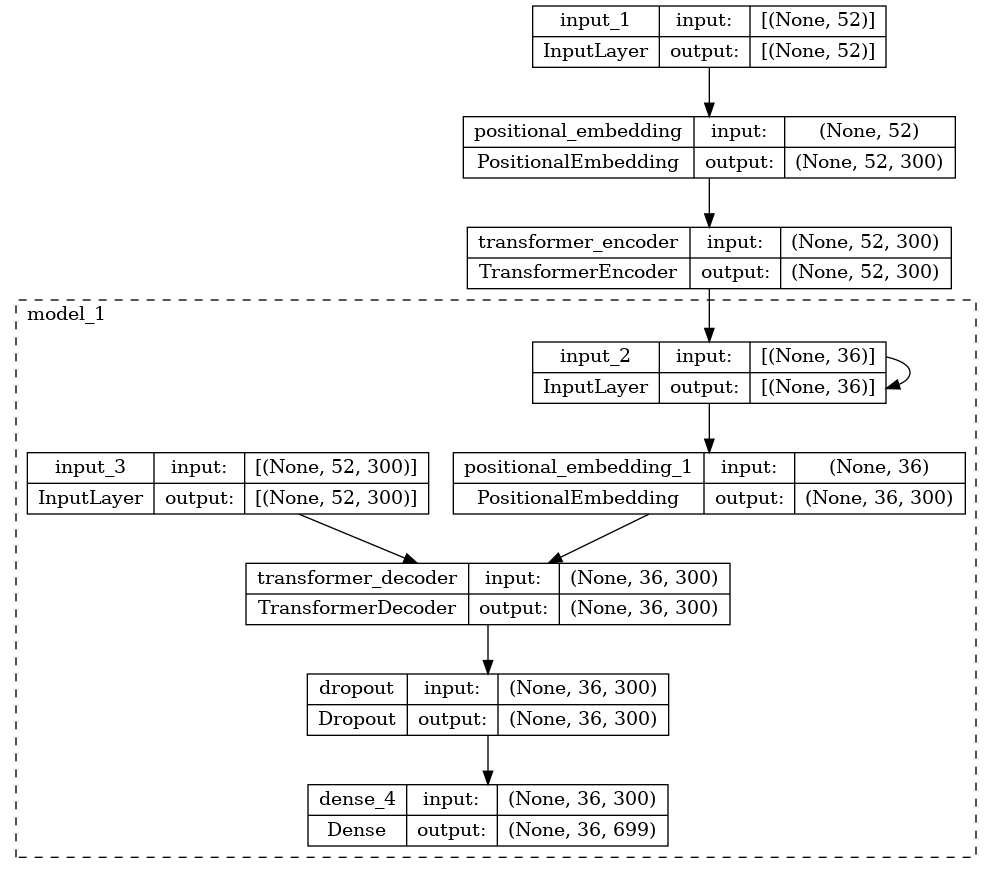

In [35]:
import pydot
utils.plot_model(transformer, show_shapes=True, expand_nested=True)

In [36]:
transformer.compile(optimizer = Adam(0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
batch_size = 64
epochs = 10

In [37]:
checkpoint = ModelCheckpoint('best_model_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min')

In [ ]:
history = transformer.fit([encoder_input_data, decoder_input_data], decoder_output_data, epochs = epochs, batch_size = batch_size, validation_split = 0.1, callbacks = [checkpoint])

Epoch 1/10
100/100 [==============================] - 53s 506ms/step - loss: 4.1655 - acc: 0.2677 - val_loss: 3.1054 - val_acc: 0.3972
Epoch 2/10
100/100 [==============================] - 50s 501ms/step - loss: 3.0238 - acc: 0.4126 - val_loss: 2.6550 - val_acc: 0.4645
Epoch 3/10
 34/100 [=========>....................] - ETA: 38s - loss: 2.5773 - acc: 0.4741

In [ ]:
best_epoch = np.argmin(history.history['val_loss'])
print("Best epoch:",str(best_epoch) + "/" + str(epochs))
print("loss:",history.history['loss'][best_epoch])
print("acc:",history.history['acc'][best_epoch])
print("val_loss:",history.history['val_loss'][best_epoch])
print("val_acc:",history.history['val_acc'][best_epoch])

In [ ]:
epochs_vals = range(0, epochs)
losses=history.history['loss']
val_losses=history.history['val_loss']
plt.title('Losses')
plt.plot(epochs_vals, losses, label='train loss')
plt.plot(epochs_vals, val_losses, label='validation loss')
plt.legend(loc='best')
plt.show()

In [ ]:
def translate2(input_sentence):
    #Code input sentence
    input_sentence = input_sentence.replace('.', '').replace(',', '').replace('!','').replace('"','').replace('?','').lower()
    words = input_sentence.split(' ')
    coded_words =[input_word_index.get(word, input_word_index.get('<Unknown>')) for word in words]
    coded_words = pad_sequences([coded_words], maxlen = input_pad_len, padding = 'post')
    #Initialize decoder input with starting token
    decoder_input = np.reshape(target_word_index['<Start>'], (1,1))
    decoder_input = pad_sequences(decoder_input, target_pad_len, padding = 'post') #Pad decoder_input
    #Pass through the whole model sequentially:
    output_sentence = []
    for i in range(target_pad_len):
        decoder_output = transformer.predict([coded_words, decoder_input], verbose = 0)
        next_word = np.argmax(decoder_output[0, i])
        if next_word == 0:
            break
        output_sentence.append(next_word)
        if i < target_pad_len - 1:
            decoder_input[0, i+1] = next_word
    return ' '.join(inverted_target_word_index[num] for num in output_sentence).replace(' - ', '-')

In [ ]:
#LANG ZEIT REGION HOCH KOMMEN OST KOMMEN SONST REGION DEUTSCH STARK RUHIG AUCH TEILWEISE FREUNDLICH SONNE <End>
translate2('gleichzeitig weitet sich das hoch über der britannie weiter nach osten aus und beschert uns morgen in weiten teilen deutschlands ruhiges teilweise auch freundliches wetter')